In [148]:
import torch
from torch import nn
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
 # create *known* parameters
weight = 0.7
bias = 0.3

X = torch.arange(0,1,step=0.02).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Split data into TrainTestSplit data

In [150]:
train_split = int(.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
# X_train, X_test

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)
# X_train, X_test

In [152]:
len(X_train), len(X_test), len(y_train), len(y_test)

(33, 17, 33, 17)

In [153]:
def plot_predict(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    # plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
    plt.scatter(test_data, test_labels , c='y', s=4, label="Test data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    plt.legend(prop={'size': 14})

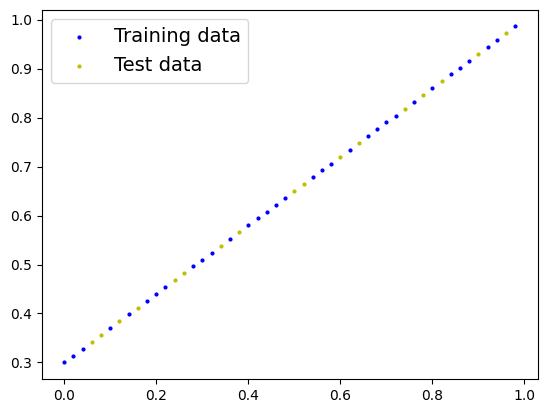

In [154]:
plot_predict()

### Building Model...

In [155]:
from torch import nn
class LinearRegressionModel(nn.Module):  # base block for building ML models in pytorch
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                  requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1))

# Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

## Initializing the Model

In [211]:
# create a random seed
# torch.manual_seed(42)

model_0 = LinearRegressionModel()
model_0, list(model_0.parameters())

(LinearRegressionModel(),
 [Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)])

In [212]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Make Prediction using Model

In [170]:
with torch.inference_mode():
    y_preds= model_0(X_test)

y_preds

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433],
        [0.4520],
        [0.3039],
        [0.2972],
        [0.3443],
        [0.2568],
        [0.2096],
        [0.1557],
        [0.3780],
        [0.1827],
        [0.1490],
        [0.1692],
        [0.4049]])

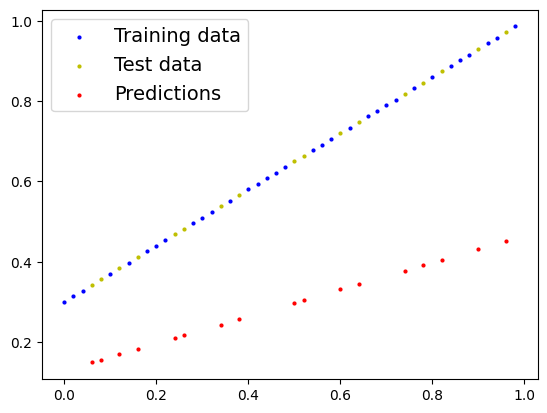

In [171]:
plot_predict(predictions=y_preds)

## Train Model
it consists of Loss function, Optimizer, Training loop and Testing loop

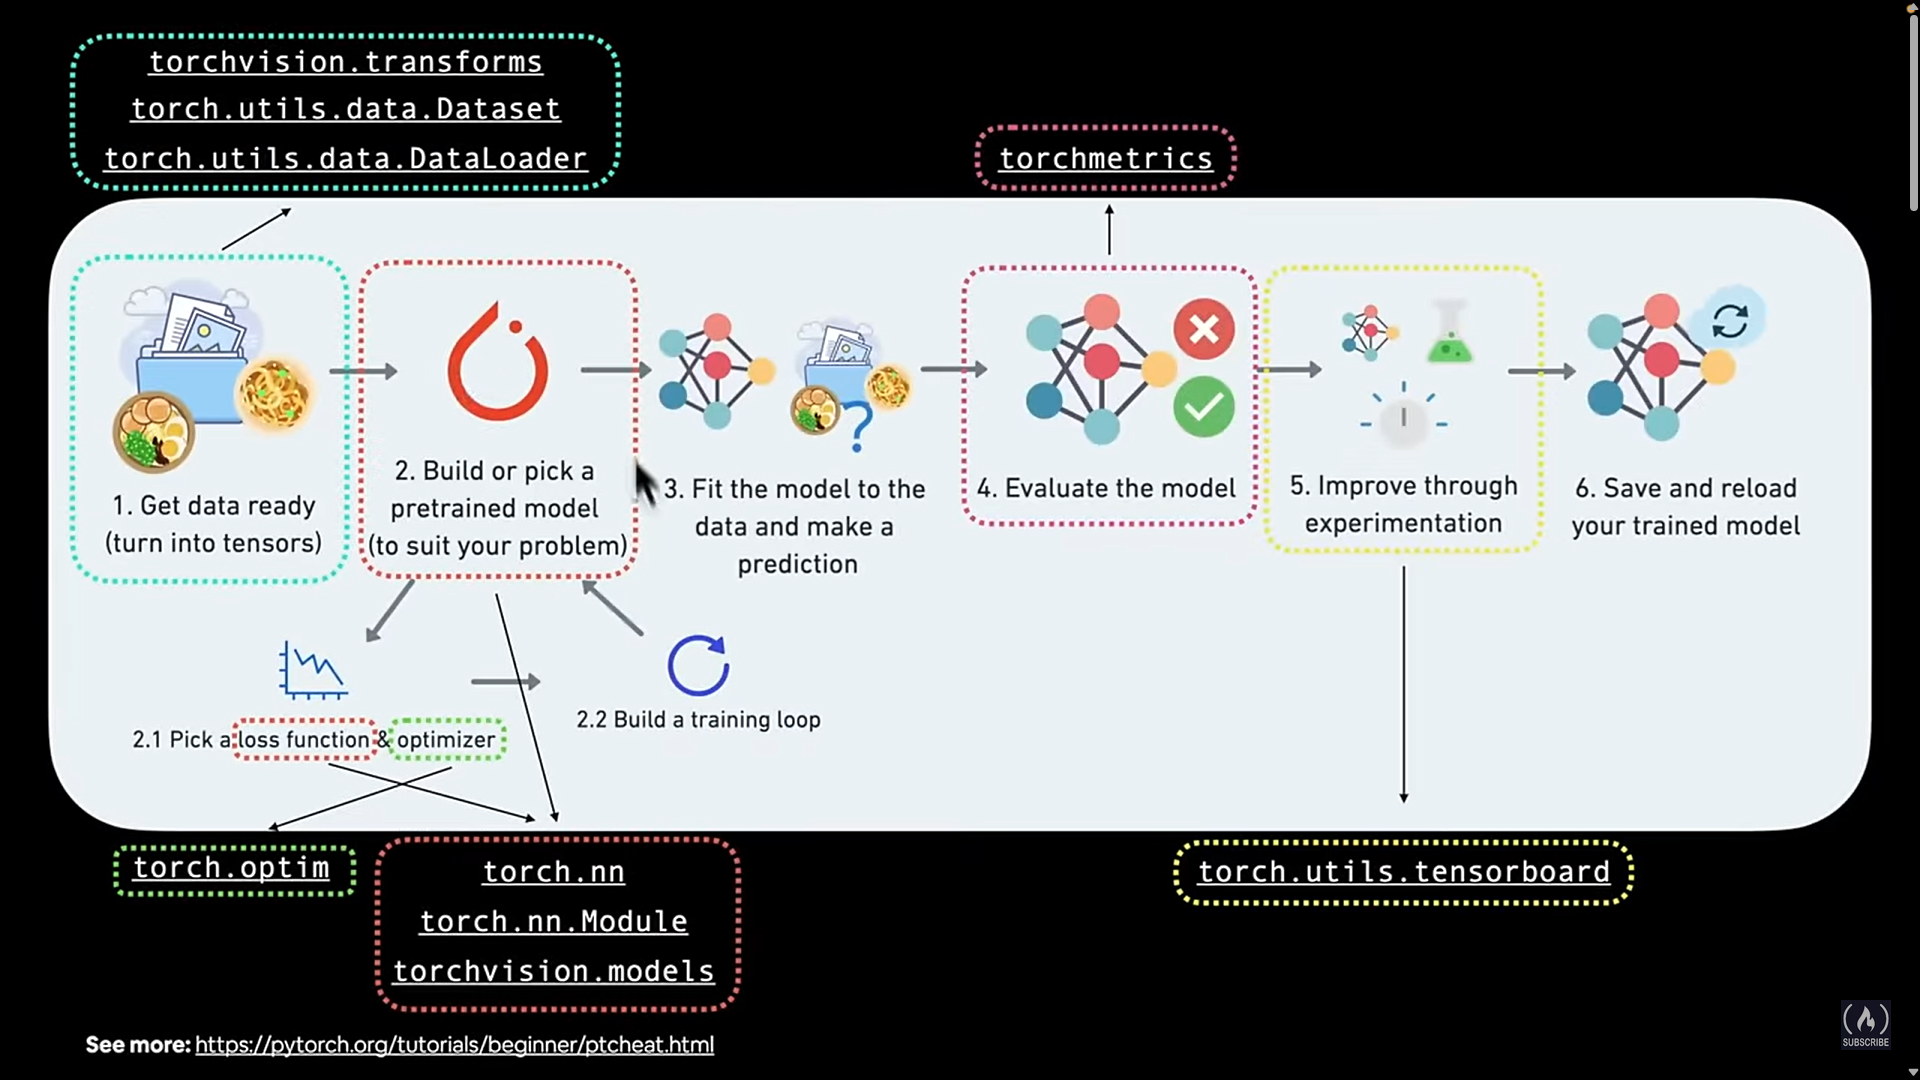

In [172]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [173]:
# Setup a loss function
loss_fn = nn.L1Loss()

In [174]:
# Setup an Optimizer
optimizer1 = torch.optim.SGD(params=model_0.parameters())
optimizer2 = torch.optim.Adam(params=model_0.parameters())

In [193]:
!nvidia-smi

Sun Feb  2 16:59:21 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.26                 Driver Version: 566.26         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   40C    P3             10W /   35W |       0MiB /   6144MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [194]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Training
### A couple of things we need in training loop is 
0. Loop through the data
1. Forward pass (forward propagation)
2. calculate the loss
3. optimizer zero grad
4. Loss backwords - move backwards through network to calculate the gradients of each of params of our model w.r.t. loss
5. Optimizer step - use the optimizers to adjusts our model's param to try and improve the loss (gradient descent) 

In [1]:
%%time
torch.manual_seed(42)

epoch_count=[]
loss_values=[]
test_loss_values=[]
epochs = 100
for epoch in range(epochs):
    model_0.train() # set model to train
    y_pred = model_0(X_train) # forward pass
    loss = loss_fn(y_pred, y_train) # setting a loss func
    optimizer1.zero_grad() # optimize zero grad
    loss.backward() # perform back propagation
    optimizer1.step() # step the optimizers (perform gradient descent)   
    model_0.eval() #set model to evaluation or testing mode
    with torch.inference_mode(): #same as torch.no_grad  but better \ turns off all unnecessary features and faster too
        test_pred = model_0(X_train) # forward pass
        test_loss = loss_fn(y_pred, y_train) # calculate the loss
    
        if (epoch % 10 == 0):
            epoch_count.append(epoch)
            loss_values.append(loss)
            test_loss_values.append(test_loss)
            print(f'Epoch: {epoch} | Loss: {loss:.3f}% | Test Loss: {test_loss:.3f}%')
            # print(model_0.state_dict())

NameError: name 'torch' is not defined

In [214]:
epoch_count, loss_values, test_loss_values

([0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 [tensor(0.3517, grad_fn=<MeanBackward0>),
  tensor(0.3517, grad_fn=<MeanBackward0>),
  tensor(0.3517, grad_fn=<MeanBackward0>),
  tensor(0.3517, grad_fn=<MeanBackward0>),
  tensor(0.3517, grad_fn=<MeanBackward0>),
  tensor(0.3517, grad_fn=<MeanBackward0>),
  tensor(0.3517, grad_fn=<MeanBackward0>),
  tensor(0.3517, grad_fn=<MeanBackward0>),
  tensor(0.3517, grad_fn=<MeanBackward0>),
  tensor(0.3517, grad_fn=<MeanBackward0>)],
 [tensor(0.3517),
  tensor(0.3517),
  tensor(0.3517),
  tensor(0.3517),
  tensor(0.3517),
  tensor(0.3517),
  tensor(0.3517),
  tensor(0.3517),
  tensor(0.3517),
  tensor(0.3517)])

In [215]:
model_0.state_dict(), (f'weight={weight}', f'bias={bias}')

(OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]),
 ('weight=0.7', 'bias=0.3'))

In [216]:
with torch.inference_mode():
    y_pred_new = model_0(X_test)

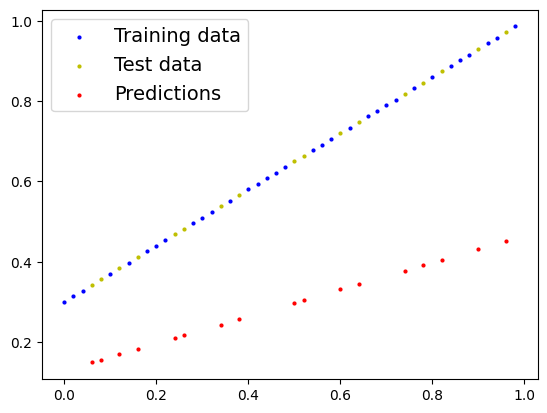

In [217]:
plot_predict(predictions=y_preds)

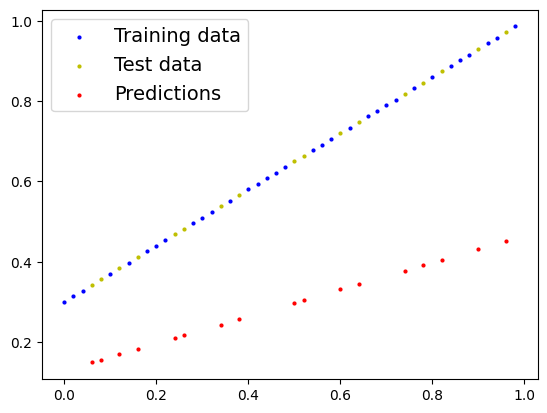

In [218]:
plot_predict(predictions=y_pred_new)

# Testing

In [146]:
epochs = 100
for epoch in range(epochs):
    # model_0.train() # set model to train
    # y_pred = model_0(X_train) # forward pass
    # loss = loss_fn(y_pred, y_train) # setting a loss func
    # optimizer2.zero_grad() # optimize zero grad
    # loss.backward() # perform back propagation
    # optimizer2.step() # step the optimizers (perform gradient descent)   
    model_0.eval() #set model to evaluation or testing mode
    with torch.inference_mode(): #same as torch.no_grad  but better \ turns off all unnecessary features and faster too
        test_pred = model_0(X_train) # forward pass
        test_loss = loss_fn(y_pred, y_train) # calculate the loss
    
        if (epoch % 20 == 0): 
            print(f'Epoch: {epoch:.2f} | Loss: {loss:.2f} | Test Loss: {test_loss:.2f}')
            # print(model_0.state_dict())

Epoch: 0.00 | Loss: 0.00 | Test Loss: 0.00
Epoch: 20.00 | Loss: 0.00 | Test Loss: 0.00
Epoch: 40.00 | Loss: 0.00 | Test Loss: 0.00
Epoch: 60.00 | Loss: 0.00 | Test Loss: 0.00
Epoch: 80.00 | Loss: 0.00 | Test Loss: 0.00


# Plot the Loss Curve
### Note: matplotlob works with numpy

Text(0, 0.5, 'Epoch')

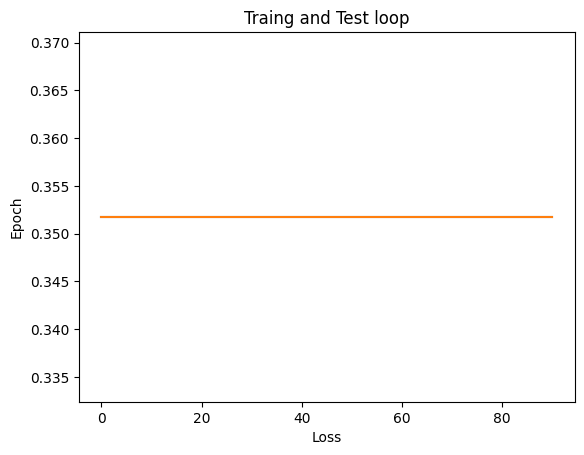

In [219]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train loss')
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label='Test loss')
plt.title('Traing and Test loop')
plt.xlabel('Loss')
plt.ylabel('Epoch')

# Saving a model
### There are 3 main methods used for saving and loading the model
1. torch.save()
2. torch.load()
3. torch.nn.Module.load_state_dict()

In [198]:
from pathlib import Path

# create a model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth" #use .pt or .pth in pytorch and .keras in tensorflow
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#save the model save dicts
print(f'Saving model: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model: models\01_pytorch_workflow_model_0.pth


# Loading a Pytorch Model

In [220]:
# since we save state_dict of our model, we gotta create an instance of our model
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [221]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [227]:
loaded_model_0.eval()
with torch.inference_mode():
    y_lpred= loaded_model_0(X_test)

y_lpred

tensor([[0.2163],
        [0.3914],
        [0.3308],
        [0.4318],
        [0.2433],
        [0.4520],
        [0.3039],
        [0.2972],
        [0.3443],
        [0.2568],
        [0.2096],
        [0.1557],
        [0.3780],
        [0.1827],
        [0.1490],
        [0.1692],
        [0.4049]])

In [228]:
y_preds == y_lpred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])